<a href="https://colab.research.google.com/github/sena1bayram/LOTUSAI_Anomali_Tespiti/blob/main/Lotus_Anomali_Tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomalik verilerin toplam sayısı (-1): 449
Normal verilerin toplam sayısı (1): 8528


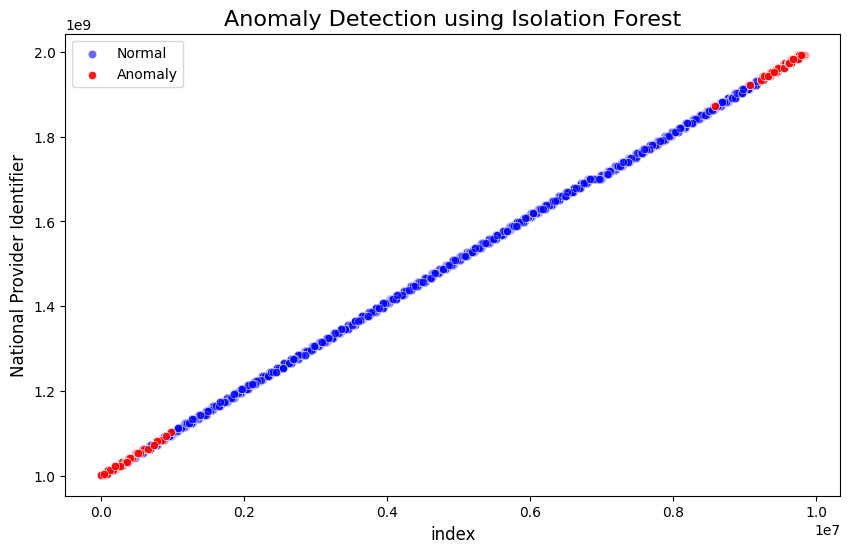

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

file_path = "Healthcare Providers.csv"
df = pd.read_csv(file_path)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.dropna()

model = IsolationForest(contamination=0.05, random_state=42)
numeric_df['Anomaly'] = model.fit_predict(numeric_df)

anomaly_count = (numeric_df['Anomaly'] == -1).sum()
normal_count = (numeric_df['Anomaly'] == 1).sum()

print(f"Anomalik verilerin toplam sayısı (-1): {anomaly_count}")
print(f"Normal verilerin toplam sayısı (1): {normal_count}")


normal_data = numeric_df[numeric_df['Anomaly'] == 1]
anomaly_data = numeric_df[numeric_df['Anomaly'] == -1]

plt.figure(figsize=(10, 6))

sns.scatterplot(x=normal_data.iloc[:, 0], y=normal_data.iloc[:, 1], color='blue', label='Normal', alpha=0.6)

sns.scatterplot(x=anomaly_data.iloc[:, 0], y=anomaly_data.iloc[:, 1], color='red', label='Anomaly', alpha=0.9)

plt.title("Anomaly Detection using Isolation Forest", fontsize=16)
plt.xlabel(f"{numeric_df.columns[0]}", fontsize=12)
plt.ylabel(f"{numeric_df.columns[1]}", fontsize=12)
plt.legend()

plt.show()



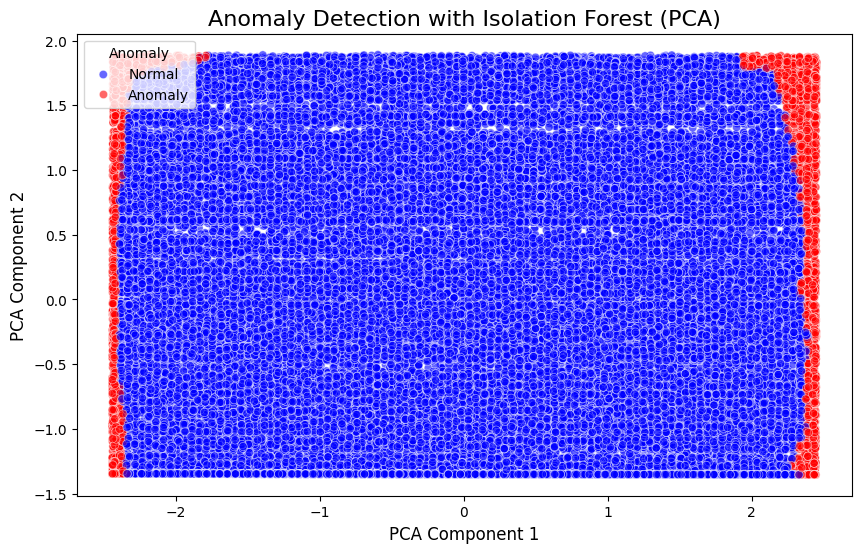

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "Healthcare Providers.csv"
df = pd.read_csv("/content/Healthcare Providers.csv")

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.dropna()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

model = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)
df['Anomaly'] = model.fit_predict(scaled_df)

normal_data = df[df['Anomaly'] == 1]
anomaly_data = df[df['Anomaly'] == -1]


pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Anomaly'], palette={1: 'blue', -1: 'red'}, alpha=0.6)
plt.title("Anomaly Detection with Isolation Forest (PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
plt.show()

df.to_csv("Healthcare_Providers_with_Anomaly.csv", index=False)


Anomalik verilerin toplam sayısı (-1): 4998
Normal verilerin toplam sayısı (1): 95002


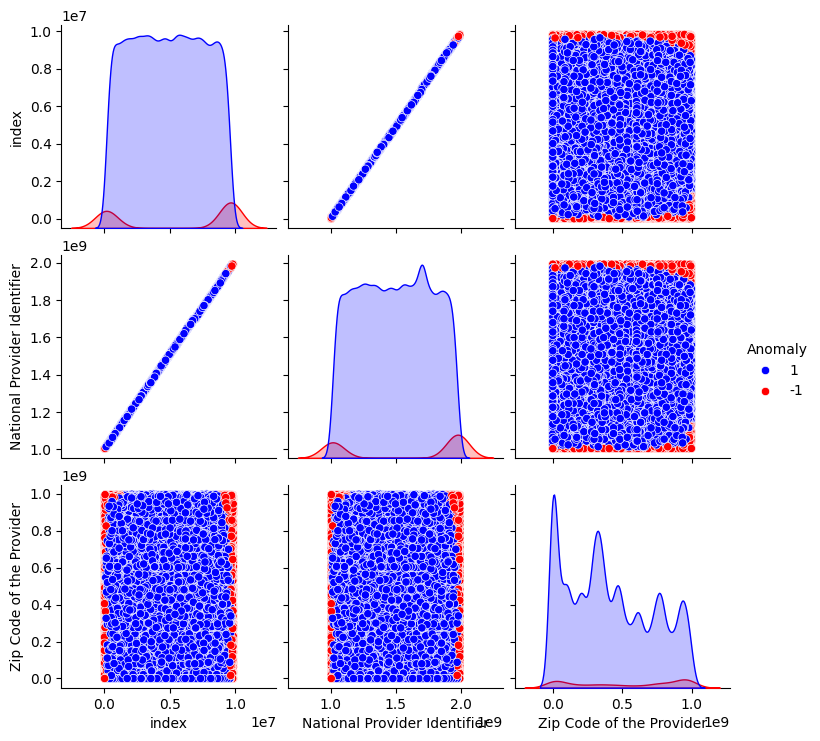

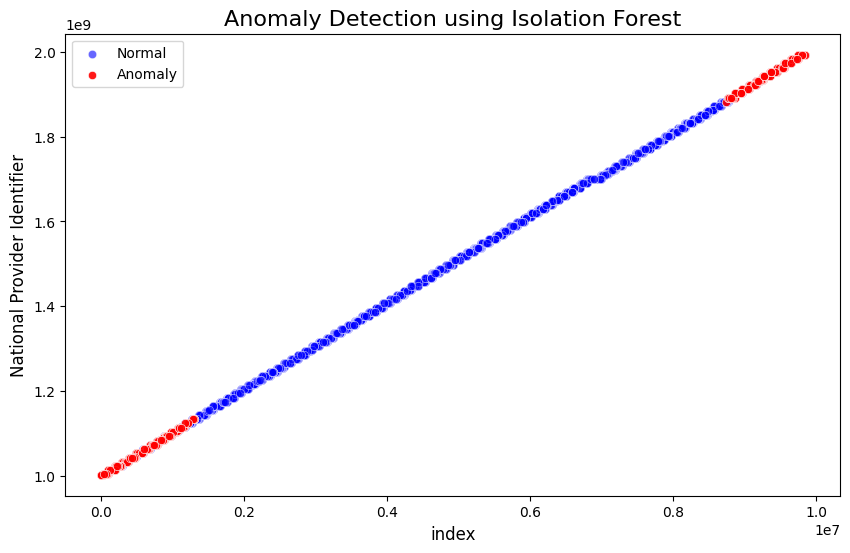

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

file_path = "Healthcare Providers.csv"
df = pd.read_csv(file_path)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.dropna()

model = IsolationForest(contamination=0.05, random_state=42)
numeric_df['Anomaly'] = model.fit_predict(numeric_df)

anomaly_count = (numeric_df['Anomaly'] == -1).sum()
normal_count = (numeric_df['Anomaly'] == 1).sum()

print(f"Anomalik verilerin toplam sayısı (-1): {anomaly_count}")
print(f"Normal verilerin toplam sayısı (1): {normal_count}")

numeric_df['Anomaly'] = numeric_df['Anomaly'].astype(str)

sns.pairplot(numeric_df, hue="Anomaly", palette={'1': 'blue', '-1': 'red'})
plt.show()

normal_data = numeric_df[numeric_df['Anomaly'] == '1']
anomaly_data = numeric_df[numeric_df['Anomaly'] == '-1']

plt.figure(figsize=(10, 6))

sns.scatterplot(x=normal_data.iloc[:, 0], y=normal_data.iloc[:, 1], color='blue', label='Normal', alpha=0.6)

sns.scatterplot(x=anomaly_data.iloc[:, 0], y=anomaly_data.iloc[:, 1], color='red', label='Anomaly', alpha=0.9)

plt.title("Anomaly Detection using Isolation Forest", fontsize=16)
plt.xlabel(f"{numeric_df.columns[0]}", fontsize=12)
plt.ylabel(f"{numeric_df.columns[1]}", fontsize=12)
plt.legend()

plt.show()
